# Transform features into Normal/Gaussian Distribution

1. A brief introduction to Gaussian Distribution
2. How to check if a variable is following Gaussian Distribution
3. Various Transformations to change the distribution of features
4. Test the Normality
>1. Log Transformation
>2. Square root Transformation
>3. Reciprocal Transformation
>4. Exponential Transformation
>5. Box-Cox Transformation

In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import pylab

import warnings
warnings.filterwarnings('ignore')

In [70]:
df=pd.read_csv("distance.csv",index_col=0)
df[['Distance']].head()

,Distance
0,3.020737
1,20.143737
2,6.198608
3,3.068178
4,10.550013


## How to check if a variable is following Normal Distribution

1. Histogram
2. Q-Q plot
3. KDE plot
4. Skewness and Kurtosis

### Checking the distribution with Skewness

In [6]:
df['Distance'].skew()

14.480102763134514

From the above result, we can check which variable is normally distributed and which is not.

1. The variables with skewness > 1  are highly positively skewed.
2. The variables with skewness < -1 are highly negatively skewed.
3. The variables with 0.5 < skewness < 1  moderately positively skewed.
4. The variables with -0.5 < skewness < -1  are moderately negatively skewed.
5. And, the variables with -0.5 < skewness < 0.5 are symmetric i.e normally distributed

### Checking the distribution of some variables using Histogram

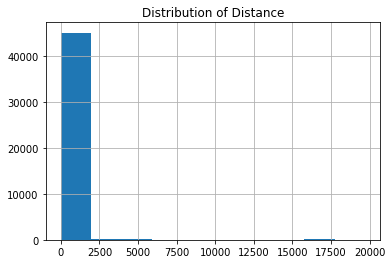

In [8]:
df.Distance.hist()
plt.title('Distribution of Distance');

Output: Highly positive Skewed i.e does not follow a normal distribution

### Checking the distribution of variables using KDE plot

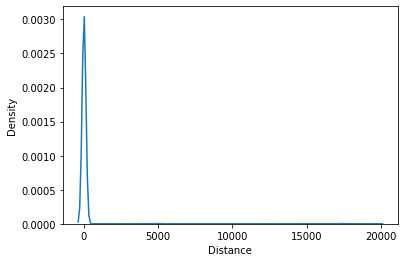

In [9]:
sns.kdeplot(df.Distance);

### Checking the distribution of variables using a Q-Q plot

A Q-Q plot is a scatterplot created by plotting two sets of quantiles against one another. If both sets of quantiles came from the same distribution, we should see the points forming a roughly straight line.

That is, if the data falls in a straight line then the variable follows normal distribution otherwise not.

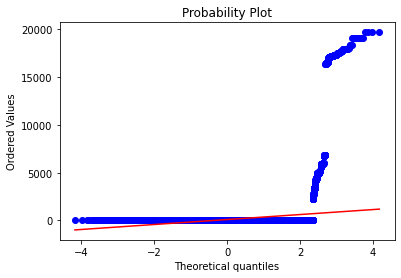

In [10]:
stats.probplot(df.Distance,plot=pylab);

Output: The X-axis of the above plot has Quantiles values and Y-axis has the Distance values. From the plot, we can analyze that the data points of the Distance feature are not falling on a straight line. This implies that it does not follow a normal distribution.

## Transformations to change the distribution of features

In [11]:
#function to return plots for the feature
def normality(data,feature):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.kdeplot(data[feature])
    plt.subplot(1,2,2)
    stats.probplot(data[feature],plot=pylab)
    plt.show()

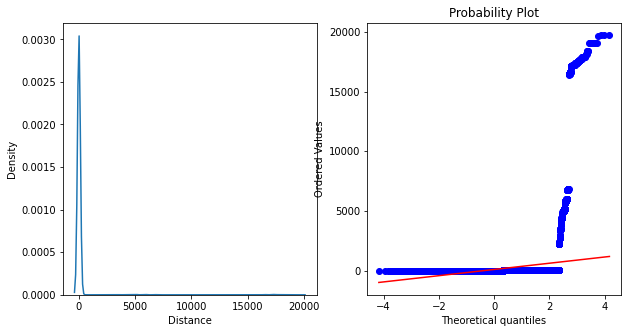

In [13]:
normality(df,'Distance')

### 1. Logarithmic Transformation – This will convert the Distance value to its log value i.e log(Distance)

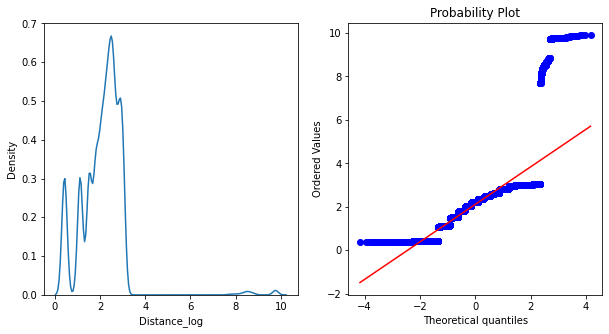

In [15]:
df['Distance_log']=np.log(df['Distance'])
normality(df,'Distance_log')

> Output: he distribution changed slightly and looks moderately skewed now. More data points are also falling on the line in the Q-Q plot.

### Reciprocal Transformation – This will inverse values of Distance i.e1/Distance

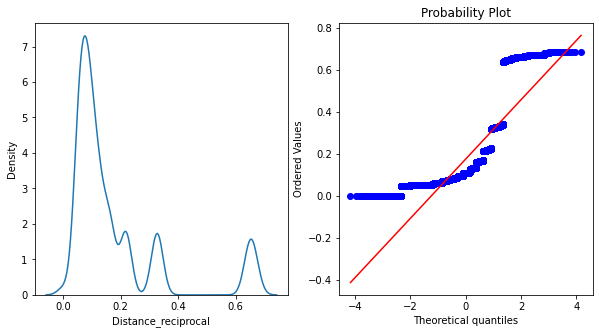

In [16]:
df['Distance_reciprocal']=1/df.Distance
normality(df,'Distance_reciprocal')

> Output: Still moderately poitive skewed now

### Square Root Transformation – This transformation will take the square root of the Distance column i.e sqrt(Distance).

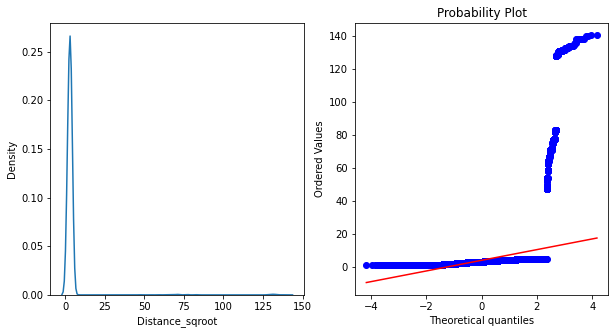

In [18]:
df['Distance_sqroot']=np.sqrt(df.Distance)
normality(df,'Distance_sqroot')

### Exponential Transformation: The exponential value of the Distance variable will be taken.

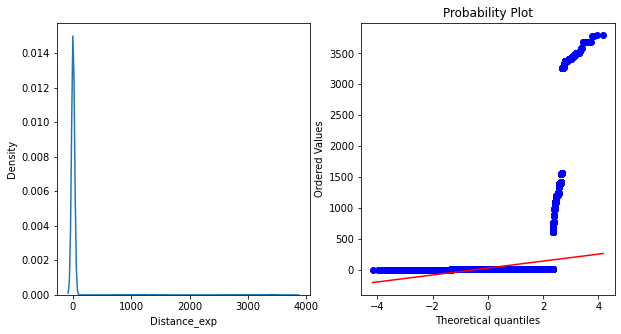

In [19]:
df['Distance_exp']=df.Distance**(1/1.2)
normality(df,'Distance_exp')

### Box-Cox Transformation 

Refer :[ https://en.wikipedia.org/wiki/Q%E2%80%93Q_plot]

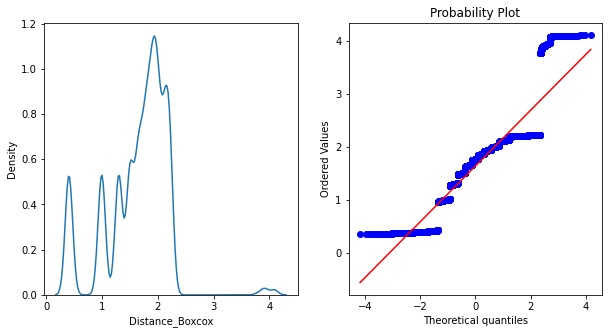

In [81]:
df['Distance_Boxcox'],parameters=stats.boxcox(df['Distance'])
normality(df,'Distance_Boxcox')

> Box cox transformation technique also gives a good result and normally distributes the feature.But in this case it is not following normal distribution. The data points on the Q-Q plot are almost on the line as well in case of normal Distribution.

### Handling Outliers

In [71]:
pd.DataFrame(pd.Series(df['Distance'].ravel()).describe()).transpose()

,count,mean,std,min,25%,50%,75%,max
0,45593.0,99.19895,1099.925157,1.463837,4.654185,9.247024,13.740932,19709.575543


In [59]:
import plotly.graph_objects as go
import plotly.express as px
fig = px.box(df, x = 'Distance', orientation = 'h')
fig.update_traces(q1=[df['Distance'].quantile(.25)],
                  median=[df['Distance'].median()],
                  q3=[df['Distance'].quantile(.75)],
                  lowerfence=[df['Distance'].min()],
                  upperfence=[df['Distance'].max()],
                 )

fig.show()

In [74]:
q1=df['Distance'].quantile(0.25)
q3=df['Distance'].quantile(0.75)
iqr=q3-q1
df['Distance_after_outlier']=df['Distance'].apply(lambda x: np.nan if x>(q3+1.5*iqr) or x<(q1-1.5*iqr) else x)
df['Distance_after_outlier']=df['Distance_after_outlier'].fillna(round(df['Distance_after_outlier'].median()))

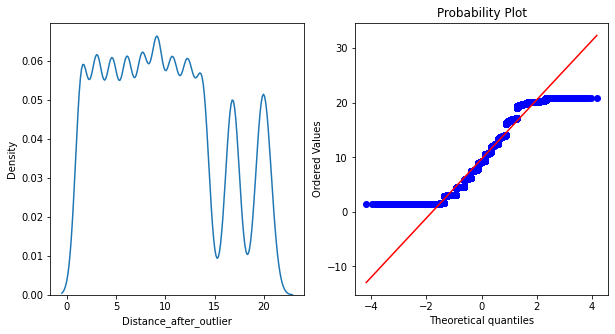

In [84]:
df['Distance_after_outlier'].skew()
normality(df,'Distance_after_outlier')

In [ ]:
The distribution is slightly positive skew

## Statistical Test for Normality

Refer : https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html

## 1. Shapiro-Wilk test

Shapiro-Wilk test is a test of normality, it determines whether the given sample comes from the normal distribution or not. Shapiro-Wilk’s test or Shapiro test is a normality test in frequentist statistics.
> Null Hypothesis: The null hypothesis of Shapiro’s test is that the population is distributed normally.

In [79]:
shapiro_test = stats.shapiro(df['Distance'])
shapiro_test

(0.056329548358917236, 0.0)

In [82]:
shapiro_test = stats.shapiro(df['Distance_Boxcox'])
shapiro_test

(0.8828432559967041, 0.0)

> Output Interpretation:

> Since in the above example, the p-value is 0.0 which is less than the alpha(0.5) then we reject the null hypothesis i.e. we have sufficient evidence to say that sample does not come from a normal distribution.